In [1]:
## import lib ##
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import time

from sklearn.neighbors import KDTree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

from scipy import spatial

In [2]:
## Load csv ##
wine = pd.DataFrame.from_csv("winequality-white.csv", sep = ";", index_col=None)

print("Length:",len(wine))
wine.head()

Length: 4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine_win = wine.drop('quality',1)
type(wine_win)
wine_win.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [4]:
wine_rno = wine_win.div(wine_win.sum(axis=1), axis=0)
wine_rno.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.027277,0.001052,0.001403,0.080662,0.000175,0.175352,0.662443,0.003901,0.011690,0.001754,0.034291
1,0.037306,0.001776,0.002013,0.009475,0.000290,0.082903,0.781652,0.005886,0.019541,0.002902,0.056255
2,0.051420,0.001777,0.002539,0.043803,0.000317,0.190446,0.615775,0.006317,0.020695,0.002793,0.064117
3,0.027294,0.000872,0.001213,0.032222,0.000220,0.178170,0.705097,0.003774,0.012093,0.001516,0.037529
4,0.027294,0.000872,0.001213,0.032222,0.000220,0.178170,0.705097,0.003774,0.012093,0.001516,0.037529


In [5]:
wine_np_X = wine_rno.as_matrix()
print(len(wine_np_X))
wine_np_X

4898


array([[ 0.02727705,  0.00105211,  0.00140282, ...,  0.01169016,
         0.00175352,  0.03429115],
       [ 0.03730614,  0.00177648,  0.00201335, ...,  0.01954131,
         0.00290159,  0.05625529],
       [ 0.05142038,  0.00177749,  0.00253928, ...,  0.02069511,
         0.00279321,  0.06411677],
       ..., 
       [ 0.03987399,  0.00147227,  0.00116555, ...,  0.01834203,
         0.00282185,  0.05766392],
       [ 0.03554793,  0.00187435,  0.00193898, ...,  0.02158729,
         0.00245604,  0.08272972],
       [ 0.04173059,  0.00146057,  0.00264294, ...,  0.02267362,
         0.00222563,  0.08207017]])

In [6]:
wine_np_y = wine['quality'].as_matrix()
wine_np_y

array([6, 6, 6, ..., 6, 7, 6])

In [7]:
np.random.seed(1943)
indices = np.random.permutation(len(wine_np_X))
n = int(0.9*len(wine_np_X))
wine_X_train = wine_np_X[indices[0:n]]
wine_y_train = wine_np_y[indices[0:n]]
wine_X_test = wine_np_X[indices[n:4898]]
wine_y_test = wine_np_y[indices[n:4898]]

In [8]:
def cosdist(x, y):
    #return np.sum(x*y)/np.sqrt(np.sum(x)**2 * np.sum(y)**2)
    return spatial.distance.cosine(x,y)

# Compare

In [9]:
knn_LSelu = KNeighborsClassifier(n_neighbors=69, algorithm='brute', metric='euclidean')
knn_LScos = KNeighborsClassifier(n_neighbors=69, algorithm='brute', metric=cosdist)

In [10]:
s_time6 = time.time()

knn_LSelu.fit(wine_X_train,wine_y_train)
wine_y_pred = knn_LSelu.predict(wine_X_test)

e_time6 = time.time() - s_time6
#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   0   8   6   0   0   0]
 [  0   1  54  99   2   0   0]
 [  0   0  45 161   7   0   0]
 [  0   0   4  76   9   0   0]
 [  0   0   1  13   1   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.457142857143


In [11]:
s_time7 = time.time()

knn_LScos.fit(wine_X_train,wine_y_train)
wine_y_pred = knn_LScos.predict(wine_X_test)

e_time7 = time.time() - s_time7
#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   0  12   2   0   0   0]
 [  0   0  61  94   1   0   0]
 [  0   0  49 156   8   0   0]
 [  0   0   5  74  10   0   0]
 [  0   0   1  13   1   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.463265306122


In [12]:
knn_LSelu = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='euclidean')
knn_LScos = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric=cosdist)

In [13]:
s_time8 = time.time()

knn_LSelu.fit(wine_X_train,wine_y_train)
wine_y_pred = knn_LSelu.predict(wine_X_test)

e_time8 = time.time() - s_time8
#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   1   1   0   0   0   0]
 [  0   3   3   8   0   0   0]
 [  0   5  95  44   7   5   0]
 [  0   2  32 152  22   5   0]
 [  0   1   6  35  42   5   0]
 [  0   0   1   7   2   5   0]
 [  0   0   1   0   0   0   0]]

Accuracy:  0.60612244898


In [14]:
s_time9 = time.time()

knn_LScos.fit(wine_X_train,wine_y_train)
wine_y_pred = knn_LScos.predict(wine_X_test)

e_time9 = time.time() - s_time9
#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   2   0   0   0   0]
 [  0   3   5   6   0   0   0]
 [  1   4  96  41   8   6   0]
 [  0   4  31 150  23   5   0]
 [  0   1   6  36  42   4   0]
 [  0   0   1   7   2   5   0]
 [  0   0   1   0   0   0   0]]

Accuracy:  0.604081632653


# Cosine Similarity with KD-Tree

In [9]:
knn_KDelu = KNeighborsClassifier(n_neighbors=69, algorithm='kd_tree', metric='euclidean')

In [10]:
s_time10 = time.time()
knn_KDelu.fit(wine_X_train,wine_y_train)
e_time10 = time.time() - s_time10

s_time1010 = time.time()
wine_y_pred = knn_KDelu.predict(wine_X_test)
e_time1010 = time.time() - s_time1010
#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   0   8   6   0   0   0]
 [  0   1  54  99   2   0   0]
 [  0   0  45 161   7   0   0]
 [  0   0   4  76   9   0   0]
 [  0   0   1  13   1   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.457142857143


In [17]:
## Resubstitution Validation
knn_KDelu.fit(wine_np_X,wine_np_y)
wine_y_pred = knn_KDelu.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   0   9   5   0   0   0]
 [  0   0  70  83   3   0   0]
 [  0   0  46 159   8   0   0]
 [  0   0   7  71  11   0   0]
 [  0   0   1  13   1   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.489795918367


Optimal number of neighbors: 1


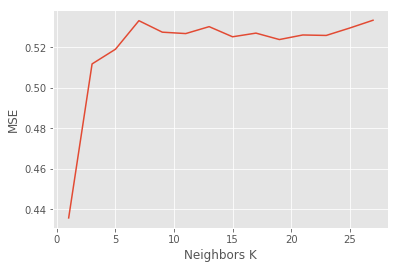

Confusion Matrix: 
 [[  0   1   1   0   0   0   0]
 [  0   3   3   8   0   0   0]
 [  0   5  95  44   7   5   0]
 [  0   2  32 152  22   5   0]
 [  0   1   6  35  42   5   0]
 [  0   0   1   7   2   5   0]
 [  0   0   1   0   0   0   0]]

Accuracy:  0.60612244898


In [18]:
## Cross Validation
neighbors = np.array(range(1,15))
neighbors = neighbors*2 -1

cv_score = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', metric='euclidean')
    scores = cross_val_score(knn, wine_X_train, wine_y_train, cv=4, scoring='accuracy')
    cv_score.append(scores.mean())
    
MSE = [1 - x for x in cv_score]
op_k = neighbors[MSE.index(min(MSE))]
print("Optimal number of neighbors:", op_k)

plt.plot(neighbors, MSE)
plt.xlabel('Neighbors K')
plt.ylabel('MSE')
plt.show()

knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='euclidean')
knn.fit(wine_X_train,wine_y_train)
wine_y_pred = knn.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ", accuracy_score(wine_y_test, wine_y_pred))

#  Cosine Similarity with Linear Search

In [11]:
knn_LSelu = KNeighborsClassifier(n_neighbors=69, algorithm='brute', metric='euclidean')

In [12]:
s_time11 = time.time()
knn_LSelu.fit(wine_X_train,wine_y_train)
e_time11 = time.time() - s_time11

s_time1111 = time.time()
wine_y_pred = knn_LSelu.predict(wine_X_test)
e_time1111 = time.time() - s_time1111
#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   0   8   6   0   0   0]
 [  0   1  54  99   2   0   0]
 [  0   0  45 161   7   0   0]
 [  0   0   4  76   9   0   0]
 [  0   0   1  13   1   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.457142857143


In [21]:
## Resubstitution Validation
knn_LSelu.fit(wine_np_X,wine_np_y)
wine_y_pred = knn_LSelu.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   0   9   5   0   0   0]
 [  0   0  70  83   3   0   0]
 [  0   0  46 159   8   0   0]
 [  0   0   7  71  11   0   0]
 [  0   0   1  13   1   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.489795918367


Optimal number of neighbors: 1


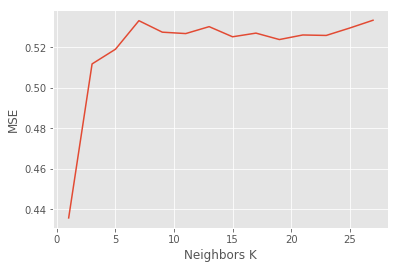

Confusion Matrix: 
 [[  0   1   1   0   0   0   0]
 [  0   3   3   8   0   0   0]
 [  0   5  95  44   7   5   0]
 [  0   2  32 152  22   5   0]
 [  0   1   6  35  42   5   0]
 [  0   0   1   7   2   5   0]
 [  0   0   1   0   0   0   0]]

Accuracy:  0.60612244898


In [22]:
## Cross Validation
neighbors = np.array(range(1,15))
neighbors = neighbors*2 -1

cv_score = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='euclidean')
    scores = cross_val_score(knn, wine_X_train, wine_y_train, cv=4, scoring='accuracy')
    cv_score.append(scores.mean())
    
MSE = [1 - x for x in cv_score]
op_k = neighbors[MSE.index(min(MSE))]
print("Optimal number of neighbors:", op_k)

plt.plot(neighbors, MSE)
plt.xlabel('Neighbors K')
plt.ylabel('MSE')
plt.show()

knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='euclidean')
knn.fit(wine_X_train,wine_y_train)
wine_y_pred = knn.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ", accuracy_score(wine_y_test, wine_y_pred))

# Elapsed Time

In [14]:
print("LScos:",e_time11, "\n     :", e_time1111)
print("KDcos:",e_time10, "\n     :", e_time1010)

LScos: 0.0006587505340576172 
     : 0.04192614555358887
KDcos: 0.002615690231323242 
     : 0.011778593063354492
